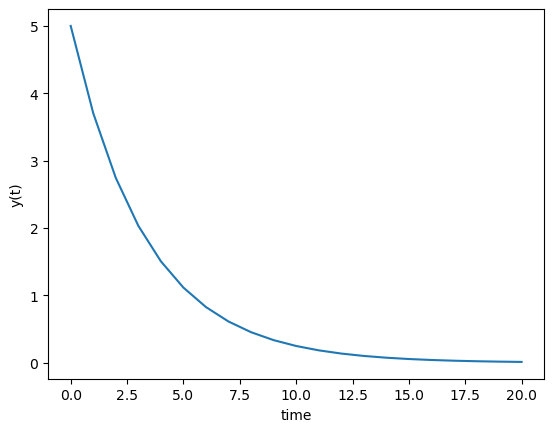

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from random import *

# function that returns dy/dt
def model(y,t):
    k = 0.3  # the parameter
    dydt = -k * y # the form of ODE
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20,21)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

In [9]:
# Generating y_data from the plot above... but, to include randomness (as the case would be for any real-life data), adding/subtracting a small number to/from y[j] to get y_data[j]

y_data= np.zeros((21,1))
for j in range(0,21):
    y_data[j]= y[j] + randint(-100, 100)/10000

Parameter k is value is: [0.3161]


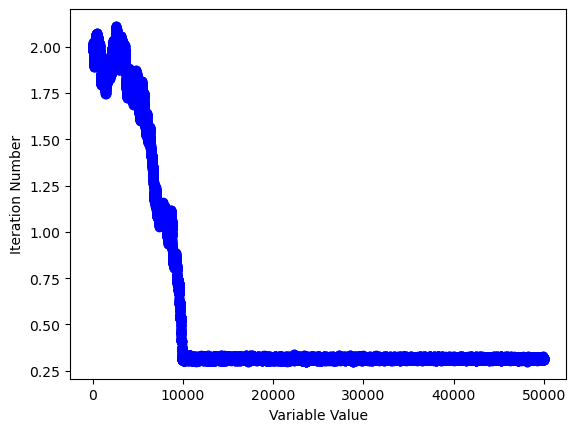

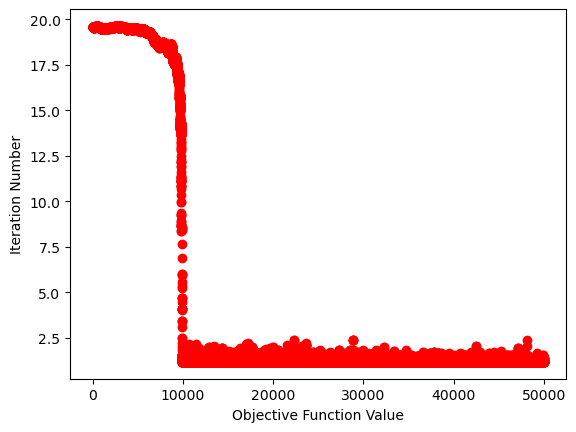

In [14]:

#y0*math.exp(-k*t[j]) - y_data[j]


#seed(1) # to keep random numbers consistent

n_iterations = 50000 # we can also have a stopping criteria, rather than fixing number of iterations



def objective(k):
	return sum((y0*math.exp(-k*t[j])/y_data[j] - 1)**2 for j in range(0,21))      # objective function that we are trying to optimize

# we know the form of y_model which is equal to y0*math.exp(-k*t[j]) since dy/dt=-ky


initial_val= 2        # Initial Guess for the unknown variable (that we are trying to find out)... this may play a vital role

step_size = 1          # some idea about the neighborhood for search
obj_tolerance= 1e-4   # how better the potential new point should be, to move to that point


current_pt= initial_val # the current point
current_obj= objective(initial_val) # the objective function value at the current point



# for post-processing of results like plotting etc.

tolerance= {i:0 for i in range(0,n_iterations)}
pt_plot1= np.zeros((n_iterations,1))
pt_plot2= np.zeros((n_iterations,1))
iteration= np.zeros((n_iterations,1))



for i in range(0,n_iterations):

    potential_pt= current_pt + step_size * randint(-100, 100)/10000 # potential new point; it is up to the user how close/far the agent is allowed to go, w.r.t. current point
                                                                    # vary this and see the impact        
    potential_obj= objective(potential_pt) # the objective at that potential point

    
    difference_in_fitness= potential_obj - current_obj 
    
    if (difference_in_fitness < 0): # if potential point's objective is better than the best value of objective found till now, updating the best objective and the best point till now
        
        if (difference_in_fitness < -obj_tolerance): # moving to the new point, if that has objective better than (greater by at least obj_tolerance value) the current point
            current_pt= potential_pt
            current_obj= potential_obj
        else:
            current_pt= current_pt
            current_obj= current_obj

    else:

        tol= math.exp(-difference_in_fitness/objective(initial_val)*float(math.sqrt(i+1))) # not necessarily sqrt: some function of initial/later iterations... so, some function of (i+1)
                                                                                           # one can change the exact functionality, keeping the nature same 
                                                                                           # do vary these and see the impact        
    # if potential point is worse:  the "tol" is a fraction (0 to 1) -- for earlier iterations, value close to 1 and latter, value close to 0
    # similarly, for little worse potential point, tol value close to 1 and for more worse potential point, tol value close to 0
    # check with other representation such square of iteration number, scaling w.r.t. initial value or initial objective
    
        tolerance[i]= tol

        r= randint(0, 100)/100

        if (r < tol): # agent will move to worse point if the random number (a fraction) is more or less than the "tol"
        # so, in initial iterations, higher chance of selecting worse move (exploration) and latter, less chance of worse move (as the algorithm should have reached near to the optimal by then)
            current_obj= potential_obj
            current_pt= potential_pt

    pt_plot1[i]= current_pt
    pt_plot2[i]= current_obj
    iteration[i]= i


print("Parameter k is value is:", pt_plot1[n_iterations-1])

plt.scatter(iteration, pt_plot1, c ="blue")
plt.xlabel("Variable Value")
plt.ylabel("Iteration Number")
plt.show()

plt.scatter(iteration, pt_plot2, c ="red")
plt.xlabel("Objective Function Value")
plt.ylabel("Iteration Number")
plt.show()


